### What we're going to do:
1. Examine OpenAI Gym with CartPole as an example environment
2. Get hands-on experience with states (observations), actions, and rewards
3. Do a little Q-Learning with Numpy

### What are the three things that you need to do Q-Learning?
1. States
2. Actions
3. Rewards

We assume that when we're in some state, we can take an action, and get a reward back.

#### State
* Some representation of our relationship with the world
 * e.g. Pixels for Mario
 * e.g. position, velocity, angle, angular velocity for CartPole
* There is usually a "terminal state" after which we can take no more actions
 
#### Action
* Some [noun] that we can perform that allows us to have an effect on our environment
 * e.g. It can allow us to move around in the environment
 
#### Reward
* Pretty self-explanatory...
* Rewards can be positive, negative, or zero
* We typically receive a reward every time we take an action

* Actions and States can be continuous or discrete (but continuous things are usually converted into discrete things because they're easier to deal with)

# 1. Examine OpenAI Gym with CartPole

### Start with imports

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

### Create an instance of the CartPole environment
```
env = gym.make("CartPole-v0")
```

In [2]:
env = gym.make("CartPole-v0")

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


### Reset the environment
* Needs to be done before you use the environment
```
env.reset()
```

In [3]:
env.reset()

array([ 0.03132688,  0.03492485, -0.01026163,  0.00538725])

### Check out the actions we can take
* OpenAI Gym wants us to be the best people we can be, so they don't label the actions that we can take
* Not labeling actions forces us to make generic models
```
env.action_space
```
* How many actions are available?

In [4]:
env.action_space

Discrete(2)

### Count the number of actions in the action space
* There's no API call for this... which is a little suspicious
```
num_actions = 0
while env.action_space.contains(num_actions):
    num_actions += 1
```

### Check out the state (observation) space
* Again, OpenAI Gym wants us to be the best people we can be, so we're not supposed to know what the numbers in the states correspond to
```
env.observation_space
```
* A Box just means that there are N dimensions, and each of those N dimensions has an upper and lower limit

In [5]:
env.observation_space

Box(4,)

### Get the upper limit of the observation space
```
env.observation_space.high
```

In [6]:
env.observation_space.high

array([  4.80000019e+00,   3.40282347e+38,   4.18879032e-01,
         3.40282347e+38], dtype=float32)

### Get the lower limit of the observation space
```
env.observation_space.low
```

In [7]:
env.observation_space.low

array([ -4.80000019e+00,  -3.40282347e+38,  -4.18879032e-01,
        -3.40282347e+38], dtype=float32)

# 2. Get hands-on experience with states, actions, and rewards

### Take a couple "steps" in the environment by taking actions
* We know that actions are `Discrete(2)`, which means that we have to possible actions: 0 and 1
* When we take an action in the environment (we take a "step"), the environment returns:
```
(new_state, reward, done, info)
```
* `new_state` is the state that we end up in by taking our specified action
* `reward` is the number of points that we get by taking our action
* `done` is a boolean indicator that we've reached a terminal state
* `info` is... not really used for anything; it's usually a dictionary that's full of mysterious sadness

```
action = 0 # or 1
new_state, reward, done, _ = env.step(action)
print(new_state, reward)
# Pick a new action if you want
new_state, reward, done, _ = env.step(action)
print(new_state, reward)
```

In [8]:
env.reset()

array([ 0.03754025,  0.01459144,  0.01221327, -0.01677236])

### Run an environment to completion
* Basic idea is to take steps until the environment returns a `done` value of `True`
* You can take random actions by sampling from the action space
```
new_state, reward, done, _ = env.step(env.action_space.sample())
```
* Just slap the line above into an appropriately terminated loop

In [9]:
new_state, reward, done, _ = env.step(env.action_space.sample())

### Estimate the most likely states from this environment
* This is totally a preprocessing step for the Q-Learning that we're going to do later
* We want to append each of the elements of the new state vector to their own array
 * e.g. we have a list for each element of our state, and after each step we append the elements of the new states to the appropriate list
* We're going to build a histogram of information about the most likely states
```
state_lists = []
fake_state = env.reset()
for i, fs in enumerate(fake_state):
    state_lists.append([fs,])

new_state, reward, done, _ = env.step(env.action_space.sample())
for i, ns in enumerate(new_state):
    state_lists[i].append(ns)
```

In [10]:
state_lists = []
fake_state = env.reset()
for i, fs in enumerate(fake_state):
    state_lists.append([fs,])
print(state_lists)
new_state, reward, done, _ = env.step(env.action_space.sample())
for i, ns in enumerate(new_state):
    state_lists[i].append(ns)
print(state_lists)

[[0.013758515074195496], [-0.0092581739745372787], [-0.027787378793261652], [-0.027504016408366274]]
[[0.013758515074195496, 0.01357335159470475], [-0.0092581739745372787, 0.18625102028783097], [-0.027787378793261652, -0.028337459121428977], [-0.027504016408366274, -0.32882303304294197]]


### Do this for a bunch of episodes
* A single episode elapses after the environment returns a `done` of `True`
* We want to do this a bunch of times, so
```
for i in range(LOTS_OF_EPISODES):
    # probably something goes here
    for j in range(500):
        # appropriately terminating episode
```
* Don't forget to reset the environment after the end of each episode!

In [11]:
for i in range(10000):
    env.reset()
    for j in range(500):
        action = env.action_space.sample()
        new_state, reward, done, _ = env.step(action)
        for i, ns in enumerate(new_state):
            state_lists[i].append(ns)
        if done:
            break

### Plot some histograms
```
for i in range(len(state_lists)):
    plt.hist(state_lists[i])
    plt.show()
```
* If you're feeling frisky, try using the bins parameter in the `plt.hist` call

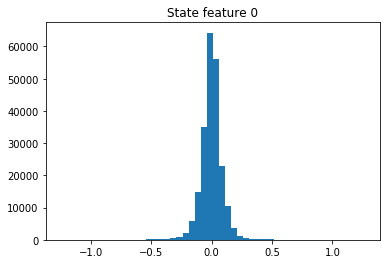

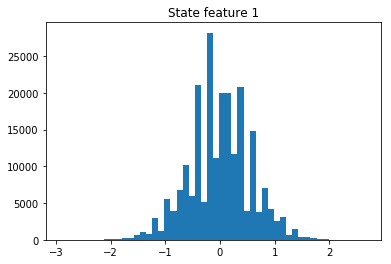

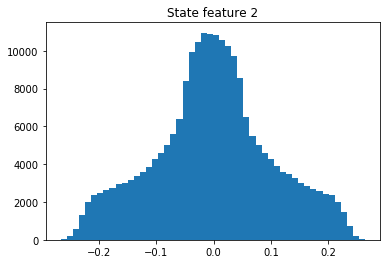

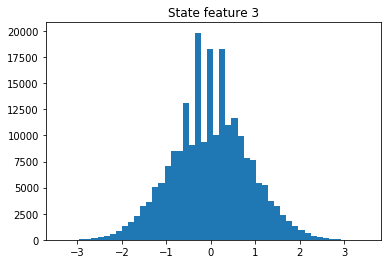

In [14]:
for i in range(len(state_lists)):
    plt.hist(state_lists[i], bins=50)
    plt.title("State feature " + str(i))
    plt.show()

### If you want to render the environment, add an env.render()
inside of one of the loops you've created. Or make a new loop. I'm a Jupyter notebook, not a cop.
* You'll want to run the `env.render()` method outside of Jupyter, though